In [1]:
import numpy as np
import matplotlib.pyplot as plt
from ot.greenkhorn.ot import OT as greenkhorn
from ot.apdamd.ot import OT as apdamd
from ot.tests.sample_problem import *
from ot.ot import cost
import timeit

In [2]:
dim = 1
n_sample = 5
my_problem = sample_problem(n_sample)
my_problem = sample_gaussian_OT(dim, n_sample, None)
#epss = 4 * np.linspace(1.0, 2.0, 10) * np.log(n_sample)
epss = np.linspace(0.001,0.01, 10)
n_iters = [None]
timings_greenkhorn = dict()
timings_apdamd = dict()
std_timings_greenkhorn = dict()
std_timings_apdamd = dict()
transport_plans_greenkhorn = dict()
transport_plans_apdamd = dict()
costs_greenkhorn = dict()
costs_apdamd = dict()
for i, eps in enumerate(epss):
    n_iter = None
    transport_plans_greenkhorn[(n_iter, eps)], _, __ = greenkhorn(None, *my_problem[1:], eps=eps,
    iter_max=n_iter)
    print(_, __)
    transport_plans_apdamd[(n_iter, eps)], _, __  = apdamd(*my_problem, eps=eps, iter_max=n_iter)
    print(_, __)
    costs_apdamd[(n_iter, eps)] = cost(my_problem[1], transport_plans_apdamd[(n_iter, eps)])
    costs_greenkhorn[(n_iter, eps)] = (cost(my_problem[1], transport_plans_greenkhorn[(n_iter, eps)]))
    timing_greenkhorn = %timeit -o -r 2 -n 1 greenkhorn( * my_problem, eps, iter_max=n_iter)
    timing_apdamd = %timeit -o -r 5 -n 1 apdamd( * my_problem, eps, iter_max=n_iter)
    timings_greenkhorn[(n_iter, eps)] = np.mean(timing_greenkhorn.timings)
    std_timings_greenkhorn[(n_iter, eps)] = np.std(timing_greenkhorn.timings)
    timings_apdamd[(n_iter, eps)] = np.mean(timing_apdamd.timings)
    std_timings_apdamd[(n_iter, eps)] = np.std(timing_apdamd.timings)

np.savez('./timings.npz', timings_greenkhorn=timings_greenkhorn, timings_apdamd=timings_apdamd, std_timings_greenkhorn=std_timings_greenkhorn, std_timings_apdamd=std_timings_apdamd, transport_plans_greenkhorn=transport_plans_greenkhorn, transport_plans_apdamd=transport_plans_apdamd, costs_greenkhorn=costs_greenkhorn, costs_apdamd=costs_apdamd)

1 100000000


KeyboardInterrupt: 

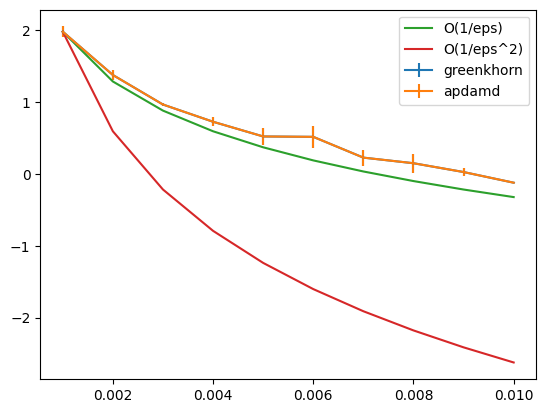

In [25]:
result = np.load('./timings.npz', allow_pickle=True)
timings_greenkhorn = result['timings_greenkhorn'][()]
timings_apdamd = result['timings_apdamd'][()]
timings_greenkhorn = timings_apdamd
std_timings_greenkhorn = result['std_timings_greenkhorn'][()]
std_timings_apdamd = result['std_timings_apdamd'][()]
std_timings_greenkhorn = std_timings_apdamd
plt.errorbar(epss, np.log([timings_greenkhorn[(None, eps)] for eps in epss]),
         np.array([std_timings_greenkhorn[(None, eps)] for  eps in epss])/np.array([timings_greenkhorn[(None, eps)] for eps in epss]), label='greenkhorn')
plt.errorbar(epss, np.log([timings_apdamd[(None, eps)] for eps in epss]),
             np.array([std_timings_apdamd[(None, eps)] for eps in epss])/np.array(
                    [timings_apdamd[(None, eps)] for eps in epss])
             , label='apdamd')
plt.plot(epss, -1 * np.log(epss)+np.log(epss[0])+np.log(timings_apdamd[(None, epss[0])]), label='O(1/eps)')
plt.plot(epss, -2 * np.log(epss)+2*np.log(epss[0])+np.log(timings_greenkhorn[(None, epss[0])]), label='O(1/eps^2)')

plt.legend()
plt.show()

plt.close()

plt.plot(epss, [costs_greenkhorn[(n_iter, eps)] for eps in epss], label='greenkhorn')
#plt.plot(epss, [costs_apdamd[(n_iter, eps)] for eps in epss], label='apdamd')
plt.legend()
plt.show()